###  Regresión y regresión

### Regresion Mensual
* Diferencia de mes 1
* Sin interpolacion
* Churn por mes


###  Escenarios a probar
* Cambiar la diferencia de mes
* Sumar Churn periodo referencia
 * Diferencia Churn
* Interpolar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [3]:
data= pd.read_csv('dataSetCompleto_old.csv',sep=',', header = 0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data_global=data.copy()

In [5]:
# EVITAR LECTURA
data=data_global.copy()

In [6]:
data['VOLUNTARIO'].value_counts()

-1    3234383
 0     514009
Name: VOLUNTARIO, dtype: int64

In [7]:
sel_variables_descrip=['CUENTA','FECHA','COD_NODO','INVOLUNTARIO', 'VOLUNTARIO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CHURN_TEMPRANO']
sel_variables_razones=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO','BAJAS_TOTAL']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M', 'PROM_PRECIO']

In [8]:
data.columns

Index(['CUENTA', 'COD_SERVICIO', 'Velocidad', 'Internet', 'COD_NODO',
       'ESTRATO', 'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON', 'CANTIDAD_LLAMADAS',
       'CANTIDAD_ADMIN', 'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX',
       'CAMPANA_ADULTO', 'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI',
       'CAMPANA_VOZ', 'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV',
       'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25',
       'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR',
       'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1'

In [9]:
data[sel_variables_razones]

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3748388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3748389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3748390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
data

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,operador_menor_tarifa,ALFA_tarifa,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,cuenta,MES,val_cantidad_muestras,val_muestras_ok,ind_calidad
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,NINGUNO,NaN,2.0,2.0,0.0,88384766.0,8.0,332.0,106.0,0.319277
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,NINGUNO,NaN,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,NINGUNO,NaN,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,AVG_TARIFA_ETB,0.895650,0.0,0.0,0.0,2139171.0,8.0,212.0,107.0,0.504717
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,AVG_TARIFA_MOVISTAR,1.065949,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748387,90354179,PH5,@,5,1GV,2,0,0,0,0,...,NINGUNO,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
3748388,8087598,CMB,@,100,CVB,4,0,0,0,0,...,NINGUNO,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3748389,71164933,R30,@,30,BTC,2,0,0,0,0,...,AVG_TARIFA_ETB,0.861084,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3748390,71189674,5BA,@,5,P04,4,0,0,0,0,...,AVG_TARIFA_MOVISTAR,0.874398,8.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN


In [11]:
maestro_data=data[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

In [12]:
data['BAJAS_TOTAL'].sum()

-456867

In [13]:
data['PROM_PRECIO']=data['PROM_RENTA']/data['PROM_VEL_HOGAR']

In [14]:
data['PROM_PRECIO']

0          1044.000000
1          2071.826923
2          2043.260000
3          1311.897059
4          1260.892857
              ...     
3748387    1466.861538
3748388    1452.011494
3748389    2108.863636
3748390    1502.594203
3748391    1227.328947
Name: PROM_PRECIO, Length: 3748392, dtype: float64

### PLAN
*  Agrupacion por Nodos
    * Sumar Bajas
    * Max cantidad de Usuarios
    * Calcular Indice por Nodo
* Contar Nodo sin Nullos y Nodos con baja cantidad de usuarios
 * Participación de la data total


In [15]:
data=data[data['VOLUNTARIO']==-1]

In [16]:
for col in sel_variables_razones :
    data[col]=data[col]*-1

<ipython-input-16-bbfce4ced020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col]*-1


In [17]:
data=data[(data['BAJAS_TOTAL']>=1)&(data['BAJAS_TOTAL']<=2)]

In [18]:
data=data[(data['FECHA']>=1)&(data['FECHA']<=10)]

In [19]:
data_t=data.copy()

### Agrupacion Nodos

In [20]:
nodos_tab=data.groupby(['FECHA','COD_NODO'])[['CANT_USER']].min().reset_index()

In [21]:
nodos_tab

,FECHA,COD_NODO,CANT_USER
0,1,01S,159.0
1,1,02S,135.0
2,1,03J,32.0
3,1,05J,63.0
4,1,0A6,96.0
...,...,...,...
106336,10,ZVG,299.0
106337,10,ZVS,487.0
106338,10,ZVT,141.0
106339,10,ZVZ,445.0


In [22]:
nodos_tab.nunique()

FECHA           10
COD_NODO     14065
CANT_USER      944
dtype: int64

In [23]:
nodos_tab['CANT_USER'].value_counts().describe()

count    944.000000
mean     111.283898
std      108.080818
min        1.000000
25%       10.000000
50%       69.000000
75%      227.000000
max      349.000000
Name: CANT_USER, dtype: float64

In [24]:
nodos_tab['CANT_USER'].value_counts().min()

1

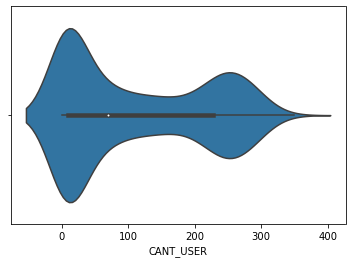

In [25]:
ax = sns.violinplot(x=nodos_tab['CANT_USER'].value_counts())

In [26]:
### Eliminar Nodos poco significativos

#####  Suma Bajas Nodo mes

In [27]:
nodos_tab_bajas=data.groupby(['FECHA','COD_NODO'])[sel_variables_razones].sum().reset_index()

In [28]:
nodos_tab_bajas

,FECHA,COD_NODO,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL
0,1,01S,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,02S,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4
2,1,03J,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2
3,1,05J,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3
4,1,0A6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106336,10,ZVG,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
106337,10,ZVS,0,0,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,8
106338,10,ZVT,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
106339,10,ZVZ,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,5


In [29]:
nodos_tab_bajas['BAJAS_TOTAL'].value_counts()

1     26541
2     20536
3     16172
4     12579
5      9260
6      6812
7      4532
8      3219
9      2146
10     1502
11      940
12      624
13      389
14      285
15      193
16      116
17      102
18       78
19       53
20       50
21       30
22       29
24       18
26       16
23       15
25       15
30       10
33       10
29        9
36        7
27        5
28        5
35        5
31        4
38        4
39        3
54        3
37        3
47        2
45        2
40        2
64        2
32        2
34        1
41        1
42        1
71        1
49        1
50        1
51        1
67        1
56        1
61        1
62        1
Name: BAJAS_TOTAL, dtype: int64

#####  Contar Meses por Nodos

In [30]:
nodos_tab['COD_NODO'].value_counts().to_frame().value_counts().sort_index()

COD_NODO
1            833
2            521
3            560
4            660
5            721
6            865
7           1027
8           1246
9           2126
10          5506
dtype: int64

### Variables Adicionales

In [31]:
data_comp=data[['COD_NODO','FECHA']+sel_variables_causas2].groupby(['COD_NODO','FECHA']).mean()
data_comp.reset_index(inplace=True)
data_comp.sort_values(['COD_NODO','FECHA'],inplace=True)

In [32]:
data_comp

,COD_NODO,FECHA,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,01J,6,NaN,NaN,1.076655,1.0,0.0,1080.740000
1,01J,9,NaN,0.277625,1.515152,1.0,1.0,1148.979592
2,01S,1,NaN,0.420691,0.824528,3.0,0.0,2357.921053
3,01S,2,NaN,0.585591,1.455621,5.5,0.0,2212.463415
4,01S,3,0.875348,0.211445,0.591549,5.0,0.0,2173.285714
...,...,...,...,...,...,...,...,...
106336,ago-01,6,NaN,NaN,NaN,NaN,NaN,NaN
106337,ago-01,7,NaN,NaN,NaN,NaN,NaN,NaN
106338,ago-01,8,NaN,NaN,NaN,NaN,NaN,NaN
106339,ago-01,9,NaN,NaN,NaN,NaN,NaN,NaN


### Union Data Frames

In [33]:
Nodos_Final=nodos_tab.merge(nodos_tab_bajas, left_on=['COD_NODO','FECHA'], right_on=['COD_NODO','FECHA'])
Nodos_Final=Nodos_Final.merge(data_comp, left_on=['COD_NODO','FECHA'], right_on=['COD_NODO','FECHA'])
Nodos_Final

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,1,01S,159.0,0,0,0,0,0,1,0,...,0,0,0,1,NaN,0.420691,0.824528,3.000,0.000000,2357.921053
1,1,02S,135.0,2,0,0,0,0,0,0,...,0,0,0,4,1.274914,0.757639,0.938875,3.250,0.750000,2767.343750
2,1,03J,32.0,0,0,0,0,0,1,1,...,0,0,0,2,NaN,NaN,1.483871,6.000,0.500000,2499.113636
3,1,05J,63.0,0,0,1,0,0,0,0,...,0,0,0,3,NaN,NaN,NaN,8.000,0.666667,2565.187500
4,1,0A6,96.0,1,0,0,0,0,0,0,...,0,0,0,2,NaN,0.063186,0.213823,9.000,0.000000,3386.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106336,10,ZVG,299.0,1,0,0,0,0,0,0,...,0,0,0,2,1.041562,NaN,NaN,3.000,0.500000,1170.731707
106337,10,ZVS,487.0,0,0,0,0,0,0,2,...,0,0,0,8,0.952015,6.214923,4.209790,1.625,0.750000,1162.821429
106338,10,ZVT,141.0,1,0,0,0,0,0,0,...,0,0,0,2,0.542212,2.595187,1.575916,2.000,0.000000,1037.273438
106339,10,ZVZ,445.0,0,0,0,0,0,0,1,...,0,0,0,5,NaN,0.583469,1.106707,4.500,0.500000,920.158333


In [34]:
#Nodos_Final.to_csv('FormatoNodo.csv')

In [35]:
Nodos_Final['Llamadas_Admin_3M']=Nodos_Final['Llamadas_Admin_3M']/Nodos_Final['CANT_USER']
Nodos_Final['Llamadas_Tecn_3M']=Nodos_Final['Llamadas_Tecn_3M']/Nodos_Final['CANT_USER']

<AxesSubplot:xlabel='Llamadas_Admin_3M', ylabel='Llamadas_Tecn_3M'>

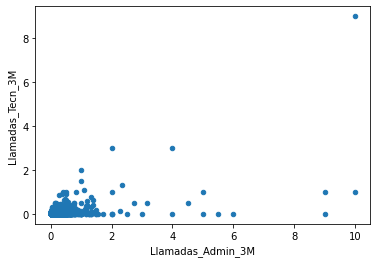

In [36]:
Nodos_Final[['Llamadas_Admin_3M','Llamadas_Tecn_3M']].plot(kind='scatter', x=0,y=1, )

In [37]:
df=Nodos_Final[['Llamadas_Admin_3M','Llamadas_Tecn_3M']]

In [38]:
df['Llamadas_Admin_3M']=np.log1p(df['Llamadas_Admin_3M'])

<ipython-input-38-1239d4d436df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Llamadas_Admin_3M']=np.log1p(df['Llamadas_Admin_3M'])


In [39]:
df['Llamadas_Tecn_3M']=np.log1p(df['Llamadas_Tecn_3M'])

<ipython-input-39-abad0ae6502e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Llamadas_Tecn_3M']=np.log1p(df['Llamadas_Tecn_3M'])


<AxesSubplot:xlabel='Llamadas_Admin_3M', ylabel='Llamadas_Tecn_3M'>

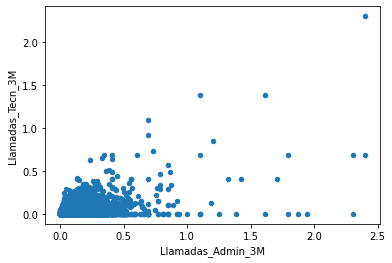

In [40]:
df[['Llamadas_Admin_3M','Llamadas_Tecn_3M']].plot(kind='scatter', x=0,y=1)

In [41]:
Nodos_Final.columns

Index(['FECHA', 'COD_NODO', 'CANT_USER', 'CONGELACION', 'VIAJES',
       'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO',
       'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS',
       'OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA', 'EMPAQUETAMIENTO',
       'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO', 'BAJAS_TOTAL',
       'ALFA_tarifa', 'ALFA', 'BETA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M',
       'PROM_PRECIO'],
      dtype='object')

In [42]:
Nodos_Final['ind_churn']=np.where(Nodos_Final['CANT_USER']>0,Nodos_Final['BAJAS_TOTAL']/Nodos_Final['CANT_USER'],np.nan)

In [43]:
Nodos_Final['ind_churn'].describe()

count    105052.000000
mean          0.018188
std           0.020633
min           0.001416
25%           0.009615
50%           0.014706
75%           0.022099
max           2.000000
Name: ind_churn, dtype: float64

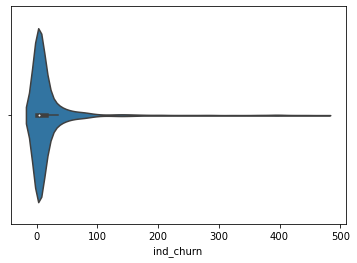

In [44]:
ax = sns.violinplot(x=Nodos_Final['ind_churn'].value_counts())

### Seleccion de Nodos

*  Nodos con pocos ususarios quantile
*  Nodos con pocos meses <10
*  Nodos con indice bajos y atipicos
*  Nodos sin información varibles adicionales

<AxesSubplot:xlabel='FECHA'>

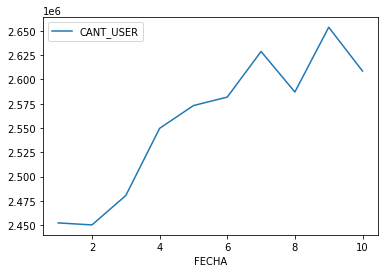

In [45]:
Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum().plot()

In [46]:
Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum()

,CANT_USER
FECHA,
1,2452222.0
2,2450159.0
3,2480454.0
4,2549643.0
5,2573119.0
6,2581833.0
7,2628834.0
8,2587097.0
9,2653797.0


<AxesSubplot:xlabel='FECHA'>

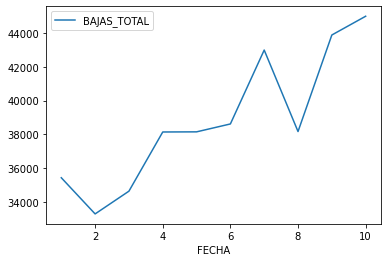

In [47]:
Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum().plot()

In [48]:
Nodos_Final['COD_NODO'].nunique()

14065

In [49]:
Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum()

,BAJAS_TOTAL
FECHA,
1,35440
2,33301
3,34646
4,38145
5,38153
6,38620
7,42989
8,38172
9,43879


In [50]:
resumen=Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum().merge(Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum(), left_index=True, right_index=True)

<AxesSubplot:xlabel='FECHA'>

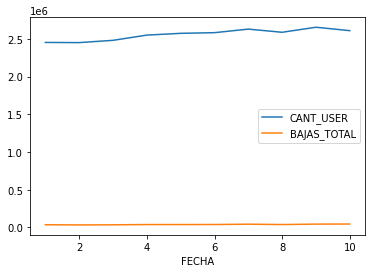

In [51]:
resumen.plot()

In [52]:
# Numero registros
print('Nodos: ',Nodos_Final['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final))

Nodos:  14065  Registros (nodosxmes):  106341


In [53]:
Nodos_Final['CANT_USER'].isnull().sum()

1289

In [54]:
Nodos_Final['CANT_USER'].describe()

count    105052.000000
mean        243.363258
std         152.334614
min           1.000000
25%         121.000000
50%         223.000000
75%         335.000000
max        1366.000000
Name: CANT_USER, dtype: float64

In [55]:
len(Nodos_Final)

106341

In [56]:
#Nodos_Final.groupby('COD_NODO')[''].
len(Nodos_Final[Nodos_Final['CANT_USER']<=30])

2026

In [57]:
Nodos_Final

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ind_churn
0,1,01S,159.0,0,0,0,0,0,1,0,...,0,0,1,NaN,0.420691,0.824528,0.018868,0.000000,2357.921053,0.006289
1,1,02S,135.0,2,0,0,0,0,0,0,...,0,0,4,1.274914,0.757639,0.938875,0.024074,0.005556,2767.343750,0.029630
2,1,03J,32.0,0,0,0,0,0,1,1,...,0,0,2,NaN,NaN,1.483871,0.187500,0.015625,2499.113636,0.062500
3,1,05J,63.0,0,0,1,0,0,0,0,...,0,0,3,NaN,NaN,NaN,0.126984,0.010582,2565.187500,0.047619
4,1,0A6,96.0,1,0,0,0,0,0,0,...,0,0,2,NaN,0.063186,0.213823,0.093750,0.000000,3386.833333,0.020833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106336,10,ZVG,299.0,1,0,0,0,0,0,0,...,0,0,2,1.041562,NaN,NaN,0.010033,0.001672,1170.731707,0.006689
106337,10,ZVS,487.0,0,0,0,0,0,0,2,...,0,0,8,0.952015,6.214923,4.209790,0.003337,0.001540,1162.821429,0.016427
106338,10,ZVT,141.0,1,0,0,0,0,0,0,...,0,0,2,0.542212,2.595187,1.575916,0.014184,0.000000,1037.273438,0.014184
106339,10,ZVZ,445.0,0,0,0,0,0,0,1,...,0,0,5,NaN,0.583469,1.106707,0.010112,0.001124,920.158333,0.011236


In [58]:
Nodos_Final_fil=Nodos_Final[Nodos_Final['CANT_USER']>30]

In [59]:
print('Nodos: ',Nodos_Final_fil['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final_fil))

Nodos:  12624  Registros (nodosxmes):  103026


In [60]:
Nodos_Final_fil['COD_NODO'].value_counts().to_frame().value_counts().sort_index()

COD_NODO
1            125
2            252
3            394
4            516
5            648
6            845
7            995
8           1246
9           2122
10          5481
dtype: int64

In [61]:
Nodos_Final_fil=Nodos_Final_fil.merge(Nodos_Final_fil['COD_NODO'].value_counts().to_frame(), left_on='COD_NODO', right_index=True, how='left')

In [62]:
Nodos_Final_fil=Nodos_Final_fil[Nodos_Final_fil['COD_NODO_y']==10]

In [63]:
Nodos_Final_fil.rename(columns={'COD_NODO_x':'COD_NODO','COD_NODO_y':'nMeses'},inplace=True)

In [64]:
print('Nodos: ',Nodos_Final_fil['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final_fil))

Nodos:  5481  Registros (nodosxmes):  54810


In [65]:
Nodos_Final_fil[['COD_NODO','FECHA']+sel_variables_causas2].isnull().sum()/len(Nodos_Final_fil)

COD_NODO             0.000000
FECHA                0.000000
ALFA_tarifa          0.295074
ALFA                 0.102135
BETA                 0.031345
Llamadas_Admin_3M    0.000091
Llamadas_Tecn_3M     0.000091
PROM_PRECIO          0.000000
dtype: float64

In [66]:
### Val interpolacion

In [67]:
Nodos_Final_fil.sort_values(['COD_NODO','FECHA'])

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ind_churn,nMeses
0,1,01S,159.0,0,0,0,0,0,1,0,...,0,1,NaN,0.420691,0.824528,0.018868,0.000000,2357.921053,0.006289,10
10296,2,01S,163.0,1,0,1,0,0,0,0,...,0,2,NaN,0.585591,1.455621,0.033742,0.000000,2212.463415,0.012270,10
20485,3,01S,160.0,0,0,2,0,0,0,0,...,0,2,0.875348,0.211445,0.591549,0.031250,0.000000,2173.285714,0.012500,10
30730,4,01S,167.0,0,0,0,0,0,0,0,...,0,1,0.871263,0.458695,0.587002,0.083832,0.017964,2183.476190,0.005988,10
41226,5,01S,171.0,2,0,1,0,0,0,0,...,0,4,1.209064,0.409383,1.217604,0.038012,0.000000,1125.036145,0.023392,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62474,6,ZVZ,444.0,0,1,1,0,0,2,0,...,0,4,NaN,1.146149,1.114969,0.011824,0.001689,1306.164706,0.009009,10
73487,7,ZVZ,440.0,0,0,2,0,0,1,0,...,0,5,NaN,1.282257,1.279740,0.005455,0.000455,1094.841584,0.011364,10
84103,8,ZVZ,443.0,0,0,0,0,0,1,1,...,0,3,NaN,1.492830,1.481245,0.008277,0.009782,921.965517,0.006772,10
95234,9,ZVZ,446.0,0,0,1,0,0,2,0,...,0,5,NaN,1.604062,1.639118,0.006726,0.007623,933.406780,0.011211,10


In [68]:
data_comp=Nodos_Final_fil[['COD_NODO','FECHA']+sel_variables_causas2].groupby(['COD_NODO','FECHA']).mean()
data_comp.reset_index(inplace=True)
data_comp.sort_values(['COD_NODO','FECHA'],inplace=True)
data_comp_pt=pd.pivot_table(data_comp,index='FECHA',columns='COD_NODO')

In [69]:
### Listar Nodos a eliminar por falta de información si le falta más de 2 datos en cada serie

In [70]:
list_eliminar=[]
i=0
for col in sel_variables_causas2:
    print(col)
    df_aux=data_comp_pt[col].isnull().sum().to_frame()
    df_aux=df_aux[df_aux[0]>2]
    if i==0:
        list_eliminar=list(df_aux.index)
    else :
        list_eliminar=list_eliminar+list(df_aux.index)
    i=i+1
list_eliminar = list(set(list_eliminar))

ALFA_tarifa
ALFA
BETA
Llamadas_Admin_3M
Llamadas_Tecn_3M
PROM_PRECIO


In [71]:
len(list_eliminar)

844

In [72]:
data_comp_pt=data_comp_pt.interpolate()
data_comp_pt.reset_index(inplace=True)
data_comp_un=data_comp_pt.melt(id_vars=['FECHA'], var_name=['varible','COD_NODO'],value_name='valor')
data_comp=pd.pivot_table(data_comp_un,index=['COD_NODO','FECHA'],columns='varible')
data_comp.columns = data_comp.columns.droplevel()
data_comp.reset_index(inplace=True)

In [73]:
data_comp

varible,COD_NODO,FECHA,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,01S,1,0.420691,NaN,0.824528,0.018868,0.000000,2357.921053
1,01S,2,0.585591,NaN,1.455621,0.033742,0.000000,2212.463415
2,01S,3,0.211445,0.875348,0.591549,0.031250,0.000000,2173.285714
3,01S,4,0.458695,0.871263,0.587002,0.083832,0.017964,2183.476190
4,01S,5,0.409383,1.209064,1.217604,0.038012,0.000000,1125.036145
...,...,...,...,...,...,...,...,...
54805,ZVZ,6,1.146149,NaN,1.114969,0.011824,0.001689,1306.164706
54806,ZVZ,7,1.282257,NaN,1.279740,0.005455,0.000455,1094.841584
54807,ZVZ,8,1.492830,NaN,1.481245,0.008277,0.009782,921.965517
54808,ZVZ,9,1.604062,NaN,1.639118,0.006726,0.007623,933.406780


In [74]:
Nodos_Final_fil=Nodos_Final_fil.drop(columns=sel_variables_causas2).merge(data_comp,left_on=['COD_NODO','FECHA'],right_on=['COD_NODO','FECHA'])

In [75]:
Nodos_Final_fil

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,1,01S,159.0,0,0,0,0,0,1,0,...,0,1,0.006289,10,0.420691,NaN,0.824528,0.018868,0.000000,2357.921053
1,1,02S,135.0,2,0,0,0,0,0,0,...,0,4,0.029630,10,0.757639,1.274914,0.938875,0.024074,0.005556,2767.343750
2,1,0AR,299.0,0,0,0,0,1,0,0,...,0,5,0.016722,10,1.009542,1.284109,1.308370,0.014716,0.002007,3017.656250
3,1,0BZ,368.0,0,0,2,0,0,0,0,...,0,8,0.021739,10,0.673503,0.925304,1.000778,0.017323,0.004076,2616.666667
4,1,0DB,384.0,2,0,1,0,1,0,0,...,0,9,0.023438,10,0.787292,1.007933,0.986667,0.016782,0.001157,2881.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54805,10,ZUL,365.0,0,0,1,0,1,1,0,...,0,6,0.016438,10,1.340873,1.121575,1.025994,0.007763,0.002740,1277.816667
54806,10,ZVD,401.0,1,0,0,0,0,1,0,...,0,8,0.019950,10,1.441161,0.844062,1.185446,0.005611,0.000000,1140.747475
54807,10,ZVG,299.0,1,0,0,0,0,0,0,...,0,2,0.006689,10,0.710697,1.041562,0.658730,0.010033,0.001672,1170.731707
54808,10,ZVS,487.0,0,0,0,0,0,0,2,...,0,8,0.016427,10,6.214923,0.952015,4.209790,0.003337,0.001540,1162.821429


In [76]:
### Eliminar Nodos con mayor imputaciones
Nodos_Final_fil=Nodos_Final_fil[~Nodos_Final_fil['COD_NODO'].isin(list_eliminar)]

In [77]:
print('Nodos: ',Nodos_Final_fil['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final_fil))

Nodos:  4637  Registros (nodosxmes):  46370


In [78]:
Nodos_Final_fil=Nodos_Final_fil.sort_values(['COD_NODO','FECHA'])

In [79]:
data.columns

Index(['CUENTA', 'COD_SERVICIO', 'Velocidad', 'Internet', 'COD_NODO',
       'ESTRATO', 'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON', 'CANTIDAD_LLAMADAS',
       'CANTIDAD_ADMIN', 'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX',
       'CAMPANA_ADULTO', 'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI',
       'CAMPANA_VOZ', 'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV',
       'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25',
       'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR',
       'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1'

### Nodos Críticos

In [80]:
Nodos_Final_fil['ind_churn'].describe()

count    46370.000000
mean         0.015593
std          0.009841
min          0.001466
25%          0.009132
50%          0.013774
75%          0.019704
max          0.233766
Name: ind_churn, dtype: float64

In [81]:
data=Nodos_Final_fil.copy()

###  Fin Agrupacion Nodos

# PROCESAMIENTO DATOS

# Configuración 0
* Sin diferencia variables explicativas

In [82]:
data_c0=data

## out

In [83]:
data_c0v2=data_c0.copy()

In [84]:
data_c0v2['ALFA_val']=np.where(data_c0v2['ALFA']>5.512517,1,0)
data_c0v2['BETA_val']=np.where(data_c0v2['BETA']>3.880706,1,0)

In [85]:
res=data_c0v2.groupby('COD_NODO')['ALFA_val','BETA_val'].sum()

<ipython-input-85-18fa785d57d4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res=data_c0v2.groupby('COD_NODO')['ALFA_val','BETA_val'].sum()


In [86]:
res['val_t']=np.where(res['ALFA_val']+res['BETA_val']>=1,1,0)

In [87]:
res

,ALFA_val,BETA_val,val_t
COD_NODO,,,
02S,0,0,0
0AR,0,0,0
0BZ,0,0,0
0DB,0,0,0
0DD,0,0,0
...,...,...,...
ZT3,0,0,0
ZUL,0,0,0
ZVD,0,0,0


In [88]:
res.sum()

ALFA_val    457
BETA_val    461
val_t       539
dtype: int64

In [89]:
data_c0v2['COD_NODO'].nunique()

4637

In [90]:
len(res[res['val_t']>0].index)

539

In [91]:
data_c0v2[data_c0v2['COD_NODO'].isin(res[res['val_t']>0].index)].groupby('FECHA').sum()

,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
FECHA,,,,,,,,,,,,,,,,,,,,,
1,139362.0,303,90,237,0,82,189,73,67,1108,...,8.885237,5390,1047.709233,407.151655,836.222851,12.865272,1.744998,1.383202e+06,33,25
2,139797.0,270,68,236,0,102,164,71,56,1059,...,8.477346,5390,1144.245866,437.812148,857.485272,13.380845,1.714143,1.329174e+06,50,30
3,139975.0,222,74,243,0,105,221,81,55,1205,...,9.096657,5390,1148.741237,440.756655,794.118877,13.474575,1.846908,1.279330e+06,43,19
4,141170.0,195,108,377,0,132,336,115,70,1024,...,9.726722,5390,1159.739694,438.713660,863.143989,11.983695,2.214474,1.132283e+06,43,27
5,141562.0,175,88,364,0,110,326,106,88,1112,...,9.611993,5390,1234.263341,436.913433,1014.377053,8.807466,1.651620,9.538796e+05,50,44
6,140615.0,201,97,351,0,103,263,107,81,1050,...,9.399852,5390,1289.072064,439.349749,1156.372496,8.717091,1.811480,8.798058e+05,50,47
7,140492.0,207,112,365,0,112,385,106,70,1150,...,10.178807,5390,1313.912774,436.487198,1293.806111,8.663056,1.580814,7.166741e+05,39,61
8,141193.0,8,129,294,0,111,323,119,48,1256,...,9.175762,5390,1263.214410,449.140367,1259.261473,8.848635,1.542831,6.721990e+05,45,78
9,141763.0,201,115,311,0,101,275,126,58,1252,...,9.890388,5390,1326.081023,386.635863,1228.198654,8.306113,1.371849,6.560288e+05,47,63


In [92]:
data_c0_bak=data_c0.copy()

In [93]:
data_c0=data_c0v2[data_c0v2['COD_NODO'].isin(res[res['val_t']==0].index)]

In [94]:
data_c0.nunique()

FECHA                             10
COD_NODO                        4098
CANT_USER                        864
CONGELACION                        9
VIAJES                             6
CAPACIDAD_DE_PAGO                 10
CAUSAS_EXTERNAS                    1
COMPETENCIA                        9
MAL_SERVICIO                      15
NO_UTILIZAR                        6
NO_GUSTO                           5
SIN_MOTIVO                        36
SIN_CONTACTO                       2
TRASLADOS                          1
OTROS                              7
CAMBIO_DE_SERVICIO                 1
CAMBIO_TARIFA                      1
EMPAQUETAMIENTO                    1
CESION_DE_CONTRATO                 1
UNIFICACION_EMPAQUETAMIENTO        2
BAJAS_TOTAL                       47
ind_churn                       4634
nMeses                             1
ALFA                           40313
ALFA_tarifa                    29766
BETA                           35858
Llamadas_Admin_3M              17775
L

In [95]:
#data_c0['ALFA']=np.where(data_c0['ALFA']>5.512517)

In [96]:
data_c0v2[data_c0v2['COD_NODO'].isin(res[res['val_t']>0].index)].groupby('FECHA').sum()

,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
FECHA,,,,,,,,,,,,,,,,,,,,,
1,139362.0,303,90,237,0,82,189,73,67,1108,...,8.885237,5390,1047.709233,407.151655,836.222851,12.865272,1.744998,1.383202e+06,33,25
2,139797.0,270,68,236,0,102,164,71,56,1059,...,8.477346,5390,1144.245866,437.812148,857.485272,13.380845,1.714143,1.329174e+06,50,30
3,139975.0,222,74,243,0,105,221,81,55,1205,...,9.096657,5390,1148.741237,440.756655,794.118877,13.474575,1.846908,1.279330e+06,43,19
4,141170.0,195,108,377,0,132,336,115,70,1024,...,9.726722,5390,1159.739694,438.713660,863.143989,11.983695,2.214474,1.132283e+06,43,27
5,141562.0,175,88,364,0,110,326,106,88,1112,...,9.611993,5390,1234.263341,436.913433,1014.377053,8.807466,1.651620,9.538796e+05,50,44
6,140615.0,201,97,351,0,103,263,107,81,1050,...,9.399852,5390,1289.072064,439.349749,1156.372496,8.717091,1.811480,8.798058e+05,50,47
7,140492.0,207,112,365,0,112,385,106,70,1150,...,10.178807,5390,1313.912774,436.487198,1293.806111,8.663056,1.580814,7.166741e+05,39,61
8,141193.0,8,129,294,0,111,323,119,48,1256,...,9.175762,5390,1263.214410,449.140367,1259.261473,8.848635,1.542831,6.721990e+05,45,78
9,141763.0,201,115,311,0,101,275,126,58,1252,...,9.890388,5390,1326.081023,386.635863,1228.198654,8.306113,1.371849,6.560288e+05,47,63


In [97]:
data_c0[sel_variables_causas2].describe()

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
count,30899.000000,40420.000000,40699.000000,40978.000000,40978.000000,40980.000000
mean,0.983422,1.185994,1.188965,0.014266,0.002507,1884.553160
std,0.199629,0.879995,0.493654,0.010636,0.004421,661.535871
min,0.446971,0.000000,0.100062,0.000000,0.000000,808.824427
25%,0.841779,0.539814,0.853853,0.007761,0.000000,1242.369020
50%,0.966411,0.979492,1.100454,0.011461,0.001294,1902.263939
75%,1.100886,1.639093,1.415612,0.017241,0.003076,2382.798713
max,2.567901,5.511956,3.864407,0.220000,0.285714,4900.888889


In [98]:
data_c0v2

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
1,1,02S,135.0,2,0,0,0,0,0,0,...,0.029630,10,0.757639,1.274914,0.938875,0.024074,0.005556,2767.343750,0,0
5482,2,02S,135.0,0,1,0,0,0,1,0,...,0.044444,10,1.162893,0.907934,1.274900,0.063704,0.011852,2750.062500,0,0
10963,3,02S,138.0,1,0,0,0,0,0,0,...,0.014493,10,0.409724,1.277684,0.765957,0.036232,0.007246,2524.657143,0,0
16444,4,02S,146.0,1,0,0,0,0,0,0,...,0.013699,10,0.729355,1.258177,0.760234,0.010274,0.000000,2361.394737,0,0
21925,5,02S,148.0,0,0,0,0,0,0,0,...,0.006757,10,0.896814,1.259581,1.371681,0.047297,0.000000,1493.883333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32885,6,ZVZ,444.0,0,1,1,0,0,2,0,...,0.009009,10,1.146149,NaN,1.114969,0.011824,0.001689,1306.164706,0,0
38366,7,ZVZ,440.0,0,0,2,0,0,1,0,...,0.011364,10,1.282257,NaN,1.279740,0.005455,0.000455,1094.841584,0,0
43847,8,ZVZ,443.0,0,0,0,0,0,1,1,...,0.006772,10,1.492830,NaN,1.481245,0.008277,0.009782,921.965517,0,0
49328,9,ZVZ,446.0,0,0,1,0,0,2,0,...,0.011211,10,1.604062,NaN,1.639118,0.006726,0.007623,933.406780,0,0


In [99]:
data_c0[sel_variables_causas2].quantile(0.99)

ALFA_tarifa             1.521492
ALFA                    4.131351
BETA                    2.907000
Llamadas_Admin_3M       0.055370
Llamadas_Tecn_3M        0.019417
PROM_PRECIO          3426.514211
Name: 0.99, dtype: float64

In [100]:
data_c0[sel_variables_causas2].quantile(0.99).to_frame()

,0.99
ALFA_tarifa,1.521492
ALFA,4.131351
BETA,2.907000
Llamadas_Admin_3M,0.055370
Llamadas_Tecn_3M,0.019417
PROM_PRECIO,3426.514211


In [101]:
data_c0.isnull().sum()

FECHA                              0
COD_NODO                           0
CANT_USER                          0
CONGELACION                        0
VIAJES                             0
CAPACIDAD_DE_PAGO                  0
CAUSAS_EXTERNAS                    0
COMPETENCIA                        0
MAL_SERVICIO                       0
NO_UTILIZAR                        0
NO_GUSTO                           0
SIN_MOTIVO                         0
SIN_CONTACTO                       0
TRASLADOS                          0
OTROS                              0
CAMBIO_DE_SERVICIO                 0
CAMBIO_TARIFA                      0
EMPAQUETAMIENTO                    0
CESION_DE_CONTRATO                 0
UNIFICACION_EMPAQUETAMIENTO        0
BAJAS_TOTAL                        0
ind_churn                          0
nMeses                             0
ALFA                             560
ALFA_tarifa                    10081
BETA                             281
Llamadas_Admin_3M                  2
L

In [102]:
len(data_c0)

40980

In [103]:
len(data_c0[data_c0['ALFA']>10])

0

In [104]:
len(data_c0[data_c0['ALFA']>10])/len(data_c0)

0.0

In [105]:
data_c0[['FECHA','CANT_USER']].groupby('FECHA').sum()

,CANT_USER
FECHA,
1,1389646.0
2,1391716.0
3,1398747.0
4,1416656.0
5,1416949.0
6,1405413.0
7,1407562.0
8,1410544.0
9,1417074.0


In [106]:
Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum()

,CANT_USER
FECHA,
1,2452222.0
2,2450159.0
3,2480454.0
4,2549643.0
5,2573119.0
6,2581833.0
7,2628834.0
8,2587097.0
9,2653797.0


In [107]:
1532737/2608639

0.5875619432202003

In [108]:
data_c0[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum()

,BAJAS_TOTAL
FECHA,
1,19143
2,17952
3,18757
4,20545
5,20364
6,20522
7,22555
8,20464
9,22891


In [109]:
Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum()

,BAJAS_TOTAL
FECHA,
1,35440
2,33301
3,34646
4,38145
5,38153
6,38620
7,42989
8,38172
9,43879


In [110]:
26013/44988

0.5782208588957055

## Configuración 1

In [111]:
data_c1=data.copy()

In [112]:
for col in sel_variables_causas2:    
    data_c1[col]=data_c1.groupby('COD_NODO')[col].diff(1)

In [113]:
data_c1.columns

Index(['FECHA', 'COD_NODO', 'CANT_USER', 'CONGELACION', 'VIAJES',
       'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO',
       'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS',
       'OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA', 'EMPAQUETAMIENTO',
       'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO', 'BAJAS_TOTAL',
       'ind_churn', 'nMeses', 'ALFA', 'ALFA_tarifa', 'BETA',
       'Llamadas_Admin_3M', 'Llamadas_Tecn_3M', 'PROM_PRECIO'],
      dtype='object')

In [114]:
data_c1

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
1,1,02S,135.0,2,0,0,0,0,0,0,...,0,4,0.029630,10,NaN,NaN,NaN,NaN,NaN,NaN
5482,2,02S,135.0,0,1,0,0,0,1,0,...,0,6,0.044444,10,0.405253,-0.366980,0.336025,0.039630,0.006296,-17.281250
10963,3,02S,138.0,1,0,0,0,0,0,0,...,0,2,0.014493,10,-0.753168,0.369750,-0.508943,-0.027472,-0.004605,-225.405357
16444,4,02S,146.0,1,0,0,0,0,0,0,...,0,2,0.013699,10,0.319631,-0.019507,-0.005724,-0.025958,-0.007246,-163.262406
21925,5,02S,148.0,0,0,0,0,0,0,0,...,0,1,0.006757,10,0.167459,0.001404,0.611447,0.037023,0.000000,-867.511404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32885,6,ZVZ,444.0,0,1,1,0,0,2,0,...,0,4,0.009009,10,0.051338,NaN,-0.432301,0.004144,-0.001383,-45.749928
38366,7,ZVZ,440.0,0,0,2,0,0,1,0,...,0,5,0.011364,10,0.136108,NaN,0.164771,-0.006370,-0.001235,-211.323122
43847,8,ZVZ,443.0,0,0,0,0,0,1,1,...,0,3,0.006772,10,0.210574,NaN,0.201505,0.002822,0.009327,-172.876067
49328,9,ZVZ,446.0,0,0,1,0,0,2,0,...,0,5,0.011211,10,0.111232,NaN,0.157873,-0.001550,-0.002158,11.441262


### Configuración 2
* Diferencial de Churn

In [115]:
data_c2=data.copy()

In [116]:
for col in sel_variables_causas2:    
    data_c2[col]=data_c2.groupby('COD_NODO')[col].diff(1)

In [117]:
for col in sel_variables_razones:    
    data_c2[col]=data_c2.groupby('COD_NODO')[col].diff(1)

###  Configuración 3
* Original ene - oct para validar

In [118]:
data_ene=data[data['FECHA']==1]
data_oct=data[data['FECHA']==10]
data_ene=data_ene[['COD_NODO']+sel_variables_causas2].groupby('COD_NODO').mean()
data_oct=data_oct[['COD_NODO']+sel_variables_causas2].groupby('COD_NODO').mean()
data_comp=data_ene.merge(data_oct,left_index=True, right_index=True, how='inner')

for col in data_ene.columns:
    data_comp[col]=data_comp[col+'_y']-data_comp[col+'_x']

data_comp=data_comp[data_ene.columns]
data_razones=data[['COD_NODO','ind_churn']+sel_variables_razones].groupby('COD_NODO').sum()
data_c3=data_razones.merge(data_comp, left_index=True, right_index=True)

In [119]:
data_c3

,ind_churn,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
COD_NODO,,,,,,,,,,,,,,,,,,,,,
02S,0.199225,5,1,2,0,0,3,0,0,17,...,0,0,0,29,-0.317352,0.821506,0.973876,-0.010469,-0.002154,-1569.997083
0AR,0.114842,1,3,9,0,2,1,2,3,19,...,0,0,0,40,-0.255045,2.024345,2.247186,0.002535,-0.001468,-1475.338790
0BZ,0.213734,9,0,16,0,4,15,5,0,31,...,0,0,0,80,0.176726,0.996138,-0.142175,-0.005458,-0.001417,-1030.537037
0DB,0.140063,5,3,9,0,2,3,1,3,28,...,0,0,0,56,-0.065334,-0.569465,-0.192549,-0.011818,-0.000448,-1744.028571
0DD,0.177026,5,2,9,0,2,8,7,1,28,...,0,0,0,64,-0.108454,0.503330,0.289210,-0.001155,0.000712,-1353.857206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZT3,0.197337,6,2,17,0,2,6,3,2,43,...,0,0,0,83,0.164167,-0.119175,-0.585135,-0.003073,-0.003060,-1378.210712
ZUL,0.093503,1,2,5,0,2,2,1,0,20,...,0,0,0,33,0.057581,0.336700,0.295835,-0.005612,0.002740,-2109.748551
ZVD,0.307918,2,6,17,0,1,11,5,5,89,...,0,0,0,136,-0.142453,-0.384777,-0.029648,-0.004283,-0.002800,-1371.719192


### Configuracion 4
* Nodos Críticos
* Configuración 2

In [120]:
data['ind_churn'].describe()

count    46370.000000
mean         0.015593
std          0.009841
min          0.001466
25%          0.009132
50%          0.013774
75%          0.019704
max          0.233766
Name: ind_churn, dtype: float64

In [121]:
data

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
1,1,02S,135.0,2,0,0,0,0,0,0,...,0,4,0.029630,10,0.757639,1.274914,0.938875,0.024074,0.005556,2767.343750
5482,2,02S,135.0,0,1,0,0,0,1,0,...,0,6,0.044444,10,1.162893,0.907934,1.274900,0.063704,0.011852,2750.062500
10963,3,02S,138.0,1,0,0,0,0,0,0,...,0,2,0.014493,10,0.409724,1.277684,0.765957,0.036232,0.007246,2524.657143
16444,4,02S,146.0,1,0,0,0,0,0,0,...,0,2,0.013699,10,0.729355,1.258177,0.760234,0.010274,0.000000,2361.394737
21925,5,02S,148.0,0,0,0,0,0,0,0,...,0,1,0.006757,10,0.896814,1.259581,1.371681,0.047297,0.000000,1493.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32885,6,ZVZ,444.0,0,1,1,0,0,2,0,...,0,4,0.009009,10,1.146149,NaN,1.114969,0.011824,0.001689,1306.164706
38366,7,ZVZ,440.0,0,0,2,0,0,1,0,...,0,5,0.011364,10,1.282257,NaN,1.279740,0.005455,0.000455,1094.841584
43847,8,ZVZ,443.0,0,0,0,0,0,1,1,...,0,3,0.006772,10,1.492830,NaN,1.481245,0.008277,0.009782,921.965517
49328,9,ZVZ,446.0,0,0,1,0,0,2,0,...,0,5,0.011211,10,1.604062,NaN,1.639118,0.006726,0.007623,933.406780


In [122]:
data['COD_NODO'].nunique()

4637

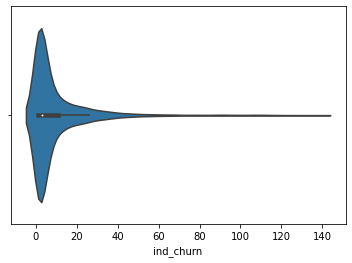

In [123]:
ax = sns.violinplot(x=data['ind_churn'].value_counts())

In [124]:
data_c4=data.copy()

In [125]:
corte=data_c4['ind_churn'].quantile(0.95)
corte=0.018

In [126]:
data_c4['sele>corte']=np.where(data_c4['ind_churn']>corte,1,0)

In [127]:
data_c4.groupby('COD_NODO')['sele>corte'].sum().to_frame().value_counts()

sele>corte
2             815
1             797
3             720
4             595
0             517
5             498
6             301
7             205
8             116
9              58
10             15
dtype: int64

In [128]:
res=data_c4.groupby('COD_NODO')['sele>corte'].sum().to_frame()
res[res['sele>corte']==2]

,sele>corte
COD_NODO,
0EG,2
0RG,2
0SD,2
12C,2
1301,2
...,...
YPS,2
Z23,2
ZD2,2


In [129]:
#Nodos a eliminar
nodos_eliminar=res[res['sele>corte']==0].index

In [130]:
data_c4=data_c4[~data_c4['COD_NODO'].isin(nodos_eliminar)]

In [131]:
print('Nodos: ',data_c4['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(data_c4))

Nodos:  4120  Registros (nodosxmes):  41200


In [132]:
data_c4

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,sele>corte
1,1,02S,135.0,2,0,0,0,0,0,0,...,4,0.029630,10,0.757639,1.274914,0.938875,0.024074,0.005556,2767.343750,1
5482,2,02S,135.0,0,1,0,0,0,1,0,...,6,0.044444,10,1.162893,0.907934,1.274900,0.063704,0.011852,2750.062500,1
10963,3,02S,138.0,1,0,0,0,0,0,0,...,2,0.014493,10,0.409724,1.277684,0.765957,0.036232,0.007246,2524.657143,0
16444,4,02S,146.0,1,0,0,0,0,0,0,...,2,0.013699,10,0.729355,1.258177,0.760234,0.010274,0.000000,2361.394737,0
21925,5,02S,148.0,0,0,0,0,0,0,0,...,1,0.006757,10,0.896814,1.259581,1.371681,0.047297,0.000000,1493.883333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32884,6,ZVS,476.0,0,0,2,0,1,1,0,...,5,0.010504,10,1.992735,1.102153,0.775940,0.007563,0.000000,2365.658537,0
38365,7,ZVS,472.0,1,0,1,0,2,1,0,...,8,0.016949,10,3.900469,1.101199,2.753425,0.009004,0.001324,1470.848485,0
43846,8,ZVS,479.0,0,0,2,0,0,2,0,...,6,0.012526,10,1.764097,1.179469,1.892508,0.009047,0.000696,1167.329268,0
49327,9,ZVS,483.0,0,0,0,0,0,0,0,...,5,0.010352,10,2.800456,1.024236,2.560411,0.006625,0.001656,1190.536585,0


In [133]:
data_c4[data_c4['COD_NODO']=='0EG']

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,sele>corte
6,1,0EG,341.0,1,0,0,0,0,0,0,...,2,0.005865,10,1.370179,0.877135,1.621622,0.014663,0.005865,2602.628571,0
5487,2,0EG,339.0,2,0,0,0,0,0,1,...,5,0.014749,10,0.541063,0.864822,0.873819,0.010619,0.002360,2497.000000,0
10968,3,0EG,344.0,0,0,0,0,0,0,0,...,3,0.008721,10,0.666133,0.860936,0.967995,0.026163,0.010659,2442.263158,0
16449,4,0EG,361.0,0,0,0,0,0,2,0,...,3,0.008310,10,0.729999,1.243872,0.780952,0.011080,0.000923,2213.780488,0
21930,5,0EG,376.0,0,0,0,0,0,1,1,...,4,0.010638,10,1.144010,1.241328,0.912195,0.015293,0.001995,2115.139535,0
27411,6,0EG,384.0,2,0,1,0,0,1,0,...,6,0.015625,10,0.627418,1.240973,1.468330,0.019965,0.000000,2067.659091,0
32892,7,0EG,376.0,2,0,2,0,1,2,0,...,10,0.026596,10,0.977923,0.875559,1.605839,0.010638,0.001862,1382.666667,1
38373,8,0EG,369.0,0,0,1,0,1,0,1,...,6,0.016260,10,0.620758,0.904225,1.114754,0.009033,0.000452,1318.850746,0
43854,9,0EG,369.0,2,1,0,0,0,1,1,...,10,0.027100,10,1.088662,0.942765,1.378151,0.010569,0.001084,1086.451220,1
49335,10,0EG,364.0,0,0,1,0,0,1,1,...,6,0.016484,10,1.087573,1.109607,2.100760,0.009615,0.003663,1072.773810,0


In [134]:
data_c4.sum()

FECHA                                                                     226600
COD_NODO                       02S02S02S02S02S02S02S02S02S02S0BZ0BZ0BZ0BZ0BZ0...
CANT_USER                                                             13273442.0
CONGELACION                                                                17830
VIAJES                                                                      8829
CAPACIDAD_DE_PAGO                                                          28361
CAUSAS_EXTERNAS                                                                0
COMPETENCIA                                                                 8869
MAL_SERVICIO                                                               24829
NO_UTILIZAR                                                                 9698
NO_GUSTO                                                                    6098
SIN_MOTIVO                                                                101231
SIN_CONTACTO                

In [135]:
data_c5=data_c4.copy()

In [136]:
for col in sel_variables_causas2:    
    data_c5[col]=data_c5.groupby('COD_NODO')[col].diff(1)

In [137]:
print('Nodos: ',data_c4['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(data_c4))

Nodos:  4120  Registros (nodosxmes):  41200


In [138]:
data_c4

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,sele>corte
1,1,02S,135.0,2,0,0,0,0,0,0,...,4,0.029630,10,0.757639,1.274914,0.938875,0.024074,0.005556,2767.343750,1
5482,2,02S,135.0,0,1,0,0,0,1,0,...,6,0.044444,10,1.162893,0.907934,1.274900,0.063704,0.011852,2750.062500,1
10963,3,02S,138.0,1,0,0,0,0,0,0,...,2,0.014493,10,0.409724,1.277684,0.765957,0.036232,0.007246,2524.657143,0
16444,4,02S,146.0,1,0,0,0,0,0,0,...,2,0.013699,10,0.729355,1.258177,0.760234,0.010274,0.000000,2361.394737,0
21925,5,02S,148.0,0,0,0,0,0,0,0,...,1,0.006757,10,0.896814,1.259581,1.371681,0.047297,0.000000,1493.883333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32884,6,ZVS,476.0,0,0,2,0,1,1,0,...,5,0.010504,10,1.992735,1.102153,0.775940,0.007563,0.000000,2365.658537,0
38365,7,ZVS,472.0,1,0,1,0,2,1,0,...,8,0.016949,10,3.900469,1.101199,2.753425,0.009004,0.001324,1470.848485,0
43846,8,ZVS,479.0,0,0,2,0,0,2,0,...,6,0.012526,10,1.764097,1.179469,1.892508,0.009047,0.000696,1167.329268,0
49327,9,ZVS,483.0,0,0,0,0,0,0,0,...,5,0.010352,10,2.800456,1.024236,2.560411,0.006625,0.001656,1190.536585,0


## CORRELACIONES

In [139]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


In [140]:
#data.drop(columns=['FECHA'],inplace=True)

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [141]:
def dic_corr_nal(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='BAJAS_TOTAL'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional.sort_values('variable_1',inplace=True)
    
    return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones

In [142]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones

In [143]:
data_c0['BAJAS_TOTAL'].sum()

206716

# Val Configuraciones

In [144]:
DataSetEntregable_totales=pd.DataFrame()

In [145]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [146]:
(res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones)=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [147]:
(RV_nal_c0, RR_nal_c0, CR_nal_c0)=dic_corr_ind(data_c0)
#(RV_nal_c1, RR_nal_c1, CR_nal_c1)=dic_corr_ind(data_c1)
#(RV_nal_c2, RR_nal_c2, CR_nal_c2)=dic_corr_ind(data_c2)
#(RV_nal_c3, RR_nal_c3, CR_nal_c3)=dic_corr_ind(data_c3)
#(RV_nal_c4, RR_nal_c4, CR_nal_c4)=dic_corr_ind(data_c4)
#(RV_nal_c5, RR_nal_c5, CR_nal_c5)=dic_corr_ind(data_c5)

<AxesSubplot:xlabel='variable_1'>

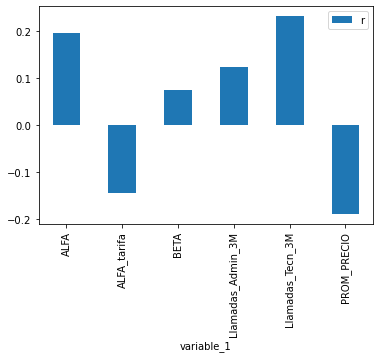

In [148]:
RV_nal_c0.set_index('variable_1').plot.bar()

In [149]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [150]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [151]:
def dic_corr_mes(data):
    res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,11):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='BAJAS_TOTAL'].drop(columns=['variable_2'])
        corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,11):
        print(i)
        aux_tab_var=dic_resultados_nacional_mes[i]['total'][dic_resultados_nacional_mes[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados_nacional_mes[i]['total'][dic_resultados_nacional_mes[i]['total']['variable_1'].isin(sel_variables_causas2)]
        aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        aux_tab_var.columns=['variable_1',str(i)+'_r']
        aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    res_corr_total_var_T=res_corr_total_var.T
    res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    return res_corr_total_raz_T, res_corr_total_var_T
        

In [152]:
def dic_corr_mes_ind(data):
    res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,11):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,11):
        print(i)
        aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        aux_tab_var.columns=['variable_1',str(i)+'_r']
        aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    res_corr_total_var_T=res_corr_total_var.T
    res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    return res_corr_total_raz_T, res_corr_total_var_T

In [153]:
(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [154]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
1_r,0.202715,-0.12324,0.07669,0.177237,0.258437,-0.206533
2_r,0.228628,-0.160722,0.073946,0.177806,0.237152,-0.212067
3_r,0.215317,-0.180608,0.060286,0.157722,0.253151,-0.216728
4_r,0.166633,-0.132609,0.03959,0.191713,0.237608,-0.152051
5_r,0.193145,-0.114166,0.070491,0.17516,0.19654,-0.135361
6_r,0.203172,-0.149303,0.076908,0.217293,0.229715,-0.163743
7_r,0.178972,-0.143735,0.050917,0.174032,0.222714,-0.130819
8_r,0.210086,-0.146506,0.059604,0.178336,0.239973,-0.078824
9_r,0.158163,-0.09244,0.018125,0.183326,0.241032,-0.091523
10_r,0.183563,-0.072266,0.006187,0.143784,0.226683,-0.047047


In [155]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

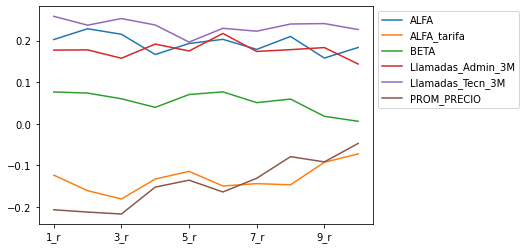

In [156]:
ax = res_corr_total_raz_T.plot.line()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

### Analisis Específicos

In [157]:
#data=data.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')

In [158]:
data.groupby('DIVISION')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False)

,BAJAS_TOTAL
DIVISION,
REGION CENTRO,90919
REGION OCCIDENTE,41783
REGION NOROCCIDENTE,34258
REGION ORIENTE,25645
REGION COSTA,14111


In [159]:
data.groupby('DIVISION')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False)

,BAJAS_TOTAL
DIVISION,
REGION CENTRO,90919
REGION OCCIDENTE,41783
REGION NOROCCIDENTE,34258
REGION ORIENTE,25645
REGION COSTA,14111


In [160]:
data.groupby('CIUDAD')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False).head(6)

,BAJAS_TOTAL
CIUDAD,
BOGOTA,82590
CALI,20461
MEDELLIN,10211
BARRANQUILLA,5440
BUCARAMANGA,4562
PEREIRA,4498


In [161]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False).head(10)

,BAJAS_TOTAL
AREA,
BOGOTA NORTE,23112
BOGOTA OCCIDENTE,21986
BOGOTA SUR,19044
BOGOTA ORIENTE,18448


### Analisis regionales

In [162]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE',
 'REGION ORIENTE',
 'REGION COSTA']

In [163]:
dic_resultados={}

In [164]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    #corr_tab_bajas=corr_tab_bajas[corr_tab_bajas['abs_r']>=0.15].sort_values('r',ascending=False)
    dic_aux['total']=corr_tab_bajas
    #dic_resultados[reg]['total']=corr_tab_bajas
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones[corr_tab_razones['abs_r']>=0.09].sort_values('r',ascending=False)
    dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE
REGION ORIENTE
REGION COSTA


In [165]:
res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg+'_r']
    
    res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE
REGION ORIENTE
REGION COSTA


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [166]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [167]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.195704,-0.144999,0.073648,0.124332,0.23172,-0.189812
REGION CENTRO_r,0.199241,-0.226165,0.092891,0.130438,0.238205,-0.226906
REGION NOROCCIDENTE_r,0.068942,-0.078166,0.026345,0.057626,0.213877,-0.154807
REGION OCCIDENTE_r,0.244055,-0.082237,0.086718,0.111905,0.223452,-0.174621
REGION ORIENTE_r,0.254902,-0.118422,0.043511,0.169832,0.257892,-0.155611
REGION COSTA_r,0.189111,-0.168603,0.093147,0.183105,0.251304,-0.19878


In [168]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.195704,-0.144999,0.073648,0.124332,0.23172,-0.189812
REGION CENTRO_r,0.199241,-0.226165,0.092891,0.130438,0.238205,-0.226906
REGION NOROCCIDENTE_r,0.068942,-0.078166,0.026345,0.057626,0.213877,-0.154807
REGION OCCIDENTE_r,0.244055,-0.082237,0.086718,0.111905,0.223452,-0.174621
REGION ORIENTE_r,0.254902,-0.118422,0.043511,0.169832,0.257892,-0.155611
REGION COSTA_r,0.189111,-0.168603,0.093147,0.183105,0.251304,-0.19878


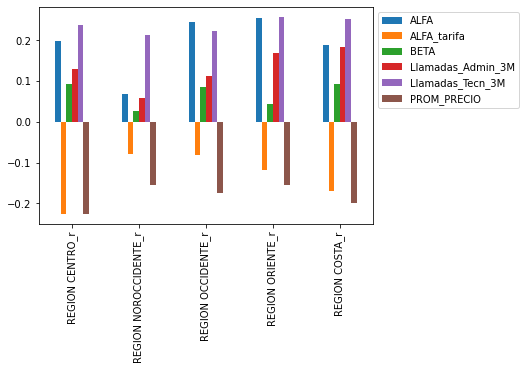

In [169]:
ax = res_corr_total_raz_T[1:].plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(30,20));

In [170]:
"""
res_corr_total_var_T=res_corr_total_var.T
res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
res_corr_total_var_T = res_corr_total_var_T.iloc[1:]

ax = res_corr_total_var_T.plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()"""

'\nres_corr_total_var_T=res_corr_total_var.T\nres_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]\nres_corr_total_var_T = res_corr_total_var_T.iloc[1:]\n\nax = res_corr_total_var_T.plot.bar()\nax.legend(bbox_to_anchor=(1.0, 1.0))\nax.plot()'

### Analisis Temporal_ ESPECIFICO

In [171]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]
    #())=dic_corr_mes_ind(data_aux)
    (res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [172]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,CATEGORIA
1_r,0.202715,-0.12324,0.07669,0.177237,0.258437,-0.206533,NaN
2_r,0.228628,-0.160722,0.073946,0.177806,0.237152,-0.212067,NaN
3_r,0.215317,-0.180608,0.060286,0.157722,0.253151,-0.216728,NaN
4_r,0.166633,-0.132609,0.03959,0.191713,0.237608,-0.152051,NaN
5_r,0.193145,-0.114166,0.070491,0.17516,0.19654,-0.135361,NaN
6_r,0.203172,-0.149303,0.076908,0.217293,0.229715,-0.163743,NaN
7_r,0.178972,-0.143735,0.050917,0.174032,0.222714,-0.130819,NaN
8_r,0.210086,-0.146506,0.059604,0.178336,0.239973,-0.078824,NaN
9_r,0.158163,-0.09244,0.018125,0.183326,0.241032,-0.091523,NaN
10_r,0.183563,-0.072266,0.006187,0.143784,0.226683,-0.047047,NaN


In [173]:
#for reg in regionales:
#    hm_corr_graf(dic_resultados[reg]['razones'],reg)

## Ciudades

In [174]:
ciudades=data.groupby('CIUDAD')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'BARRANQUILLA', 'BUCARAMANGA', 'PEREIRA'], dtype='object', name='CIUDAD')

In [175]:
dic_resultados_ciudad={}

In [176]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    #corr_tab_bajas=corr_tab_bajas[corr_tab_bajas['abs_r']>=0.15].sort_values('r',ascending=False)
    dic_aux['total']=corr_tab_bajas
    #dic_resultados[reg]['total']=corr_tab_bajas
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones[corr_tab_razones['abs_r']>=0.09].sort_values('r',ascending=False)
    dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
BUCARAMANGA
PEREIRA


In [177]:
res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg+'_r']
    
    res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
BUCARAMANGA
PEREIRA


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [178]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [179]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.195704,-0.144999,0.073648,0.124332,0.23172,-0.189812
BOGOTA_r,0.184646,-0.226001,0.091651,0.12591,0.231141,-0.225799
CALI_r,0.292256,-0.117027,0.069771,0.095302,0.192418,-0.156971
MEDELLIN_r,0.150257,-0.091847,0.068214,0.133424,0.224052,-0.137842
BARRANQUILLA_r,0.169872,-0.160228,0.008209,0.190354,0.227248,-0.101697
BUCARAMANGA_r,0.107943,-0.003092,0.087833,0.11181,0.142544,-0.107524
PEREIRA_r,0.050894,0.12306,-0.006442,-0.016079,0.167164,-0.088165


In [180]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.195704,-0.144999,0.073648,0.124332,0.23172,-0.189812
REGION CENTRO_r,0.199241,-0.226165,0.092891,0.130438,0.238205,-0.226906
REGION NOROCCIDENTE_r,0.068942,-0.078166,0.026345,0.057626,0.213877,-0.154807
REGION OCCIDENTE_r,0.244055,-0.082237,0.086718,0.111905,0.223452,-0.174621
REGION ORIENTE_r,0.254902,-0.118422,0.043511,0.169832,0.257892,-0.155611
REGION COSTA_r,0.189111,-0.168603,0.093147,0.183105,0.251304,-0.19878
BOGOTA_r,0.184646,-0.226001,0.091651,0.12591,0.231141,-0.225799
CALI_r,0.292256,-0.117027,0.069771,0.095302,0.192418,-0.156971
MEDELLIN_r,0.150257,-0.091847,0.068214,0.133424,0.224052,-0.137842
BARRANQUILLA_r,0.169872,-0.160228,0.008209,0.190354,0.227248,-0.101697


[]

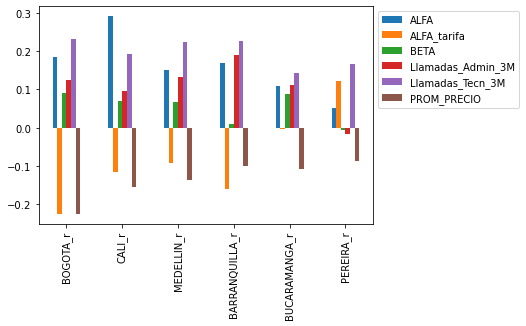

In [181]:
ax = res_corr_total_raz_T[1:].plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [182]:
"""
res_corr_total_var_T=res_corr_total_var.T
res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
res_corr_total_var_T = res_corr_total_var_T.iloc[1:]

ax = res_corr_total_var_T.plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()"""

'\nres_corr_total_var_T=res_corr_total_var.T\nres_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]\nres_corr_total_var_T = res_corr_total_var_T.iloc[1:]\n\nax = res_corr_total_var_T.plot.bar()\nax.legend(bbox_to_anchor=(1.0, 1.0))\nax.plot()'

In [183]:
#for reg in ciudades:
#    hm_corr_graf(dic_resultados_ciudad[reg]['razones'],reg)

### Analisis temporal

In [184]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]  
    #())=dic_corr_mes_ind(data_aux)
    (res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


In [185]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,CATEGORIA
1_r,0.202715,-0.12324,0.07669,0.177237,0.258437,-0.206533,NaN
2_r,0.228628,-0.160722,0.073946,0.177806,0.237152,-0.212067,NaN
3_r,0.215317,-0.180608,0.060286,0.157722,0.253151,-0.216728,NaN
4_r,0.166633,-0.132609,0.03959,0.191713,0.237608,-0.152051,NaN
5_r,0.193145,-0.114166,0.070491,0.17516,0.19654,-0.135361,NaN
...,...,...,...,...,...,...,...
6_r,0.038474,0.270856,0.016341,0.059915,0.313683,0.034917,PEREIRA
7_r,-0.067164,0.122904,-0.067514,0.021756,0.394028,0.102016,PEREIRA
8_r,0.050333,0.382995,-0.154962,-0.086185,0.210116,0.201569,PEREIRA
9_r,0.020209,0.107196,0.138076,0.061316,0.059641,0.021388,PEREIRA


### Bogotá

In [186]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [187]:
dic_resultados_Bogota={}

In [188]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    #corr_tab_bajas=corr_tab_bajas[corr_tab_bajas['abs_r']>=0.15].sort_values('r',ascending=False)
    dic_aux['total']=corr_tab_bajas
    #dic_resultados[reg]['total']=corr_tab_bajas
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones[corr_tab_razones['abs_r']>=0.09].sort_values('r',ascending=False)
    dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE


In [189]:
res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg+'_r']
    
    res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA NORTE
BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[]

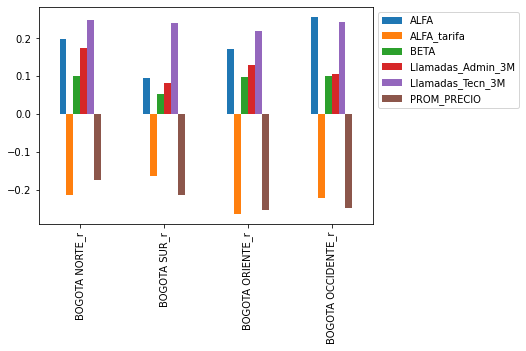

In [190]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
ax = res_corr_total_raz_T[1:].plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [191]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
BOGOTA NORTE_r,0.196971,-0.213647,0.101437,0.173286,0.248451,-0.173182
BOGOTA SUR_r,0.094817,-0.162911,0.054006,0.083,0.241489,-0.213199
BOGOTA ORIENTE_r,0.171532,-0.265416,0.097353,0.128206,0.219931,-0.253267
BOGOTA OCCIDENTE_r,0.256804,-0.222674,0.100353,0.106724,0.242262,-0.249612


In [192]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.195704,-0.144999,0.073648,0.124332,0.23172,-0.189812
REGION CENTRO_r,0.199241,-0.226165,0.092891,0.130438,0.238205,-0.226906
REGION NOROCCIDENTE_r,0.068942,-0.078166,0.026345,0.057626,0.213877,-0.154807
REGION OCCIDENTE_r,0.244055,-0.082237,0.086718,0.111905,0.223452,-0.174621
REGION ORIENTE_r,0.254902,-0.118422,0.043511,0.169832,0.257892,-0.155611
REGION COSTA_r,0.189111,-0.168603,0.093147,0.183105,0.251304,-0.19878
BOGOTA_r,0.184646,-0.226001,0.091651,0.12591,0.231141,-0.225799
CALI_r,0.292256,-0.117027,0.069771,0.095302,0.192418,-0.156971
MEDELLIN_r,0.150257,-0.091847,0.068214,0.133424,0.224052,-0.137842
BARRANQUILLA_r,0.169872,-0.160228,0.008209,0.190354,0.227248,-0.101697


In [193]:
"""
res_corr_total_var_T=res_corr_total_var.T
res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
res_corr_total_var_T = res_corr_total_var_T.iloc[1:]

ax = res_corr_total_var_T.plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()"""

'\nres_corr_total_var_T=res_corr_total_var.T\nres_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]\nres_corr_total_var_T = res_corr_total_var_T.iloc[1:]\n\nax = res_corr_total_var_T.plot.bar()\nax.legend(bbox_to_anchor=(1.0, 1.0))\nax.plot()'

In [194]:
#for reg in sectoresBog:
#    hm_corr_graf(dic_resultados_Bogota[reg]['razones'],reg)

In [195]:
### Guardar Archivo
DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [196]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]  
    #())=dic_corr_mes_ind(data_aux)
    (res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [197]:
DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

### Regresión multilineal

* Reescalado
* Modelos

In [198]:
DataSetEntregable_totales_reg=pd.DataFrame()

In [199]:
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [200]:
data_reg=data_c0.copy()

In [201]:
data_reg.set_index('COD_NODO',inplace=True)

In [202]:
data_reg

,FECHA,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
COD_NODO,,,,,,,,,,,,,,,,,,,,,
02S,1,135.0,2,0,0,0,0,0,0,0,...,0.029630,10,0.757639,1.274914,0.938875,0.024074,0.005556,2767.343750,0,0
02S,2,135.0,0,1,0,0,0,1,0,0,...,0.044444,10,1.162893,0.907934,1.274900,0.063704,0.011852,2750.062500,0,0
02S,3,138.0,1,0,0,0,0,0,0,0,...,0.014493,10,0.409724,1.277684,0.765957,0.036232,0.007246,2524.657143,0,0
02S,4,146.0,1,0,0,0,0,0,0,0,...,0.013699,10,0.729355,1.258177,0.760234,0.010274,0.000000,2361.394737,0,0
02S,5,148.0,0,0,0,0,0,0,0,0,...,0.006757,10,0.896814,1.259581,1.371681,0.047297,0.000000,1493.883333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVZ,6,444.0,0,1,1,0,0,2,0,0,...,0.009009,10,1.146149,NaN,1.114969,0.011824,0.001689,1306.164706,0,0
ZVZ,7,440.0,0,0,2,0,0,1,0,0,...,0.011364,10,1.282257,NaN,1.279740,0.005455,0.000455,1094.841584,0,0
ZVZ,8,443.0,0,0,0,0,0,1,1,0,...,0.006772,10,1.492830,NaN,1.481245,0.008277,0.009782,921.965517,0,0


In [203]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [204]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.245998
ALFA                 0.013665
BETA                 0.006857
Llamadas_Admin_3M    0.000049
Llamadas_Tecn_3M     0.000049
PROM_PRECIO          0.000000
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [205]:
data_reg=data_reg.dropna()

In [206]:
colums_reg=list(data_reg.columns)

In [207]:
colums_reg.remove('FECHA')

In [208]:
colums_reg.remove('PROM_PRECIO')

In [209]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'ind_churn']

In [210]:
for col in colums_reg:
    data_reg[col]=np.log1p(data_reg[col])

In [211]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [212]:
colums_reg.remove('ind_churn')

In [213]:
colums_reg

['ALFA_tarifa', 'ALFA', 'BETA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M']

### Nacional

In [214]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [215]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     331.6
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:08:11   Log-Likelihood:                 51119.
No. Observations:               30570   AIC:                        -1.022e+05
Df Residuals:                   30564   BIC:                        -1.022e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0632      0.001     43.946      0.000       0.060       0.066
ALFA_tarifa          -0.0334      0.003    -13.268      0.000      -0.038      -0.029
ALFA                  0.0441      0.002     27.946      0.000       0.041       0.047
BETA                 -0.0104      0.002     -4.827      0.000      -0.015      -0.006
Llamadas_Admin_3M     0.0238      0.004      5.588      0.000       0.015       0.032
Llamadas_Tecn_3M      0.0486      0.008      6.340      0.000       0.034       0.064
==============================================================================
Omnibus:                    20121.266   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640315.153
Skew:                           2.703   Prob(JB):                         0.00
Kurtosis:                      24.760   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,BETA,11.72
1,ALFA,6.86
0,ALFA_tarifa,5.34
3,Llamadas_Admin_3M,3.32
4,Llamadas_Tecn_3M,1.61


In [217]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

<AxesSubplot:>

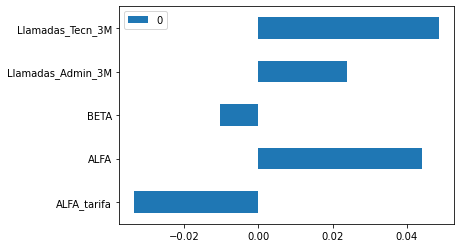

In [218]:
lr_1.params.to_frame()[1:].plot.barh()

In [219]:
df_coef_nal

,coefs
const,0.063150
ALFA_tarifa,-0.033446
ALFA,0.044146
BETA,-0.010358
Llamadas_Admin_3M,0.023808
Llamadas_Tecn_3M,0.048614


In [220]:
df_vif_nal=vif

In [221]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [222]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
coefs,-0.033446,0.044146,-0.010358,0.023808,0.048614


## Regresión en el tiempo

In [223]:
data_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ind_churn,FECHA
COD_NODO,,,,,,,,
02S,0.501349,0.301003,0.381239,0.152920,0.047464,2767.343750,0.132949,1
02S,0.306423,0.411737,0.488753,0.396987,0.100940,2750.062500,0.201432,2
02S,0.502697,0.183276,0.318400,0.228786,0.061857,2524.657143,0.061952,3
02S,0.493167,0.292345,0.316216,0.065706,0.000000,2361.394737,0.058198,4
02S,0.493855,0.341675,0.516779,0.297066,0.000000,1493.883333,0.025257,5
...,...,...,...,...,...,...,...,...
ZVD,0.334766,0.525730,0.348000,0.028566,0.000000,2254.100000,0.083214,6
ZVD,0.332677,0.628084,0.559439,0.053729,0.003423,1455.740260,0.061459,7
ZVD,0.337060,0.567912,0.577150,0.054675,0.001785,1387.708861,0.134673,8


In [224]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,11):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,11):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_vif.columns=['Features',str(i)+'_vif']

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

In [225]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10


In [226]:
df_coef

,coefs,1_coef,2_coef,3_coef,4_coef,5_coef,6_coef,7_coef,8_coef,9_coef,10_coef
const,0.063150,0.078551,0.076766,0.088933,0.084923,0.075336,0.091522,0.095153,0.073503,0.084117,0.080952
ALFA_tarifa,-0.033446,-0.002367,-0.008269,-0.016689,-0.008595,-0.005467,-0.027538,-0.024209,-0.023639,-0.008348,-0.006373
ALFA,0.044146,0.048345,0.051231,0.045738,0.057218,0.048749,0.049530,0.047124,0.049122,0.043210,0.049876
BETA,-0.010358,-0.025090,-0.027620,-0.027341,-0.048293,-0.025381,-0.034796,-0.027602,-0.023457,-0.033560,-0.034513
Llamadas_Admin_3M,0.023808,0.056622,0.034478,0.032446,0.043961,0.043002,0.036815,0.023044,0.041503,0.037035,0.026003
Llamadas_Tecn_3M,0.048614,0.023010,-0.002312,0.004176,0.027820,0.030183,0.064030,0.072474,0.030840,0.117433,0.048659


In [227]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
1_coef,-0.002367,0.048345,-0.025090,0.056622,0.023010
2_coef,-0.008269,0.051231,-0.027620,0.034478,-0.002312
3_coef,-0.016689,0.045738,-0.027341,0.032446,0.004176
4_coef,-0.008595,0.057218,-0.048293,0.043961,0.027820
5_coef,-0.005467,0.048749,-0.025381,0.043002,0.030183
6_coef,-0.027538,0.049530,-0.034796,0.036815,0.064030
7_coef,-0.024209,0.047124,-0.027602,0.023044,0.072474
8_coef,-0.023639,0.049122,-0.023457,0.041503,0.030840
9_coef,-0.008348,0.043210,-0.033560,0.037035,0.117433
10_coef,-0.006373,0.049876,-0.034513,0.026003,0.048659


In [228]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

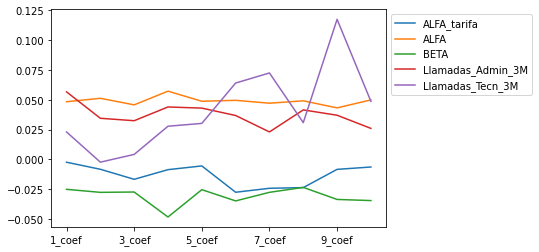

In [229]:
ax = df_coef_T.plot.line()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

## Analisis Específicos

In [230]:
data_reg_nor=data_reg.copy()

In [231]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [232]:
data_reg_nor_temp=data_reg_nor.copy()

In [233]:
data_reg_nor.pop('FECHA')

COD_NODO
02S     1
02S     2
02S     3
02S     4
02S     5
       ..
ZVD     6
ZVD     7
ZVD     8
ZVD     9
ZVD    10
Name: FECHA, Length: 30570, dtype: int64

## Regional

In [234]:
dic_resultados_reg={}

In [235]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE
REGION ORIENTE
REGION COSTA


In [236]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    aux_tab_coef.columns=[reg+'_coef']
    aux_tab_vif.columns=['Features',reg+'_vif']
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE
REGION ORIENTE
REGION COSTA


In [237]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [238]:
df_coef_T

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
coefs,-0.033446,0.044146,-0.010358,0.023808,0.048614
REGION CENTRO_coef,-0.071411,0.027868,-0.023095,0.042621,0.057479
REGION NOROCCIDENTE_coef,-0.013111,0.067799,-0.041210,0.015468,0.025210
REGION OCCIDENTE_coef,0.021932,0.086551,-0.050103,0.040427,0.014560
REGION ORIENTE_coef,-0.000043,0.046483,-0.024494,0.064145,-0.012578
REGION COSTA_coef,-0.013216,0.045321,-0.030749,0.058033,0.062869


In [239]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
coefs,-0.033446,0.044146,-0.010358,0.023808,0.048614
REGION CENTRO_coef,-0.071411,0.027868,-0.023095,0.042621,0.057479
REGION NOROCCIDENTE_coef,-0.013111,0.067799,-0.041210,0.015468,0.025210
REGION OCCIDENTE_coef,0.021932,0.086551,-0.050103,0.040427,0.014560
REGION ORIENTE_coef,-0.000043,0.046483,-0.024494,0.064145,-0.012578
REGION COSTA_coef,-0.013216,0.045321,-0.030749,0.058033,0.062869


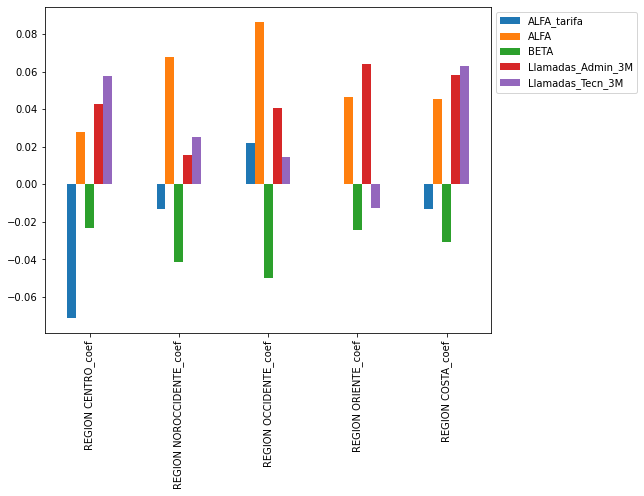

In [240]:
ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

####  Analisis temporal

In [241]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10


In [242]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,CATEGORIA
1_coef,-0.002367,0.048345,-0.025090,0.056622,0.023010,NaN
2_coef,-0.008269,0.051231,-0.027620,0.034478,-0.002312,NaN
3_coef,-0.016689,0.045738,-0.027341,0.032446,0.004176,NaN
4_coef,-0.008595,0.057218,-0.048293,0.043961,0.027820,NaN
5_coef,-0.005467,0.048749,-0.025381,0.043002,0.030183,NaN
6_coef,-0.027538,0.049530,-0.034796,0.036815,0.064030,NaN
7_coef,-0.024209,0.047124,-0.027602,0.023044,0.072474,NaN
8_coef,-0.023639,0.049122,-0.023457,0.041503,0.030840,NaN
9_coef,-0.008348,0.043210,-0.033560,0.037035,0.117433,NaN
10_coef,-0.006373,0.049876,-0.034513,0.026003,0.048659,NaN


## Ciudades

In [243]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
BUCARAMANGA
PEREIRA


In [244]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    aux_tab_coef.columns=[reg+'_coef']
    aux_tab_vif.columns=['Features',reg+'_vif']
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
BUCARAMANGA
PEREIRA


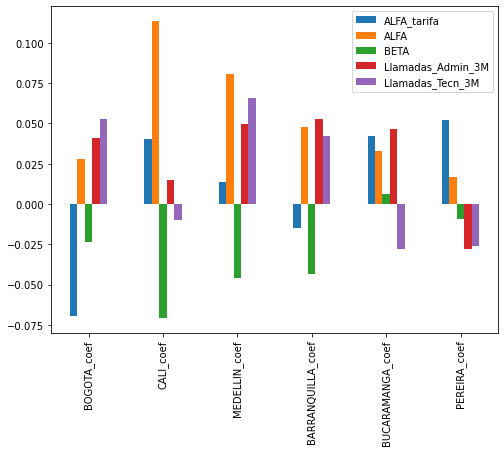

In [245]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

In [246]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T)
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
coefs,-0.033446,0.044146,-0.010358,0.023808,0.048614
REGION CENTRO_coef,-0.071411,0.027868,-0.023095,0.042621,0.057479
REGION NOROCCIDENTE_coef,-0.013111,0.067799,-0.041210,0.015468,0.025210
REGION OCCIDENTE_coef,0.021932,0.086551,-0.050103,0.040427,0.014560
REGION ORIENTE_coef,-0.000043,0.046483,-0.024494,0.064145,-0.012578
REGION COSTA_coef,-0.013216,0.045321,-0.030749,0.058033,0.062869
coefs,-0.033446,0.044146,-0.010358,0.023808,0.048614
BOGOTA_coef,-0.069597,0.028154,-0.023844,0.040696,0.052662
CALI_coef,0.040555,0.113376,-0.070511,0.014873,-0.009768
MEDELLIN_coef,0.013444,0.080949,-0.046115,0.049872,0.065994


#### Analisis temporal

In [247]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [248]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,CATEGORIA
1_coef,-0.002367,0.048345,-0.025090,0.056622,0.023010,NaN
2_coef,-0.008269,0.051231,-0.027620,0.034478,-0.002312,NaN
3_coef,-0.016689,0.045738,-0.027341,0.032446,0.004176,NaN
4_coef,-0.008595,0.057218,-0.048293,0.043961,0.027820,NaN
5_coef,-0.005467,0.048749,-0.025381,0.043002,0.030183,NaN
...,...,...,...,...,...,...
6_coef,0.082383,-0.031816,0.030014,-0.062875,0.167512,PEREIRA
7_coef,0.067951,-0.082201,0.061863,0.024768,0.243255,PEREIRA
8_coef,0.123928,0.010667,-0.027764,-0.124131,0.333653,PEREIRA
9_coef,0.041061,-0.013721,0.033652,0.029525,-0.303938,PEREIRA


## Bogota

In [249]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE


In [250]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    aux_tab_coef.columns=[reg+'_coef']
    aux_tab_vif.columns=['Features',reg+'_vif']
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA NORTE
BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE


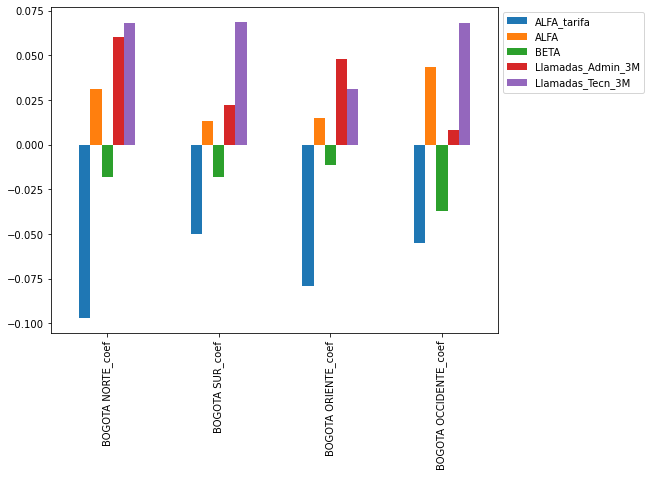

In [251]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

In [252]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
coefs,-0.033446,0.044146,-0.010358,0.023808,0.048614
REGION CENTRO_coef,-0.071411,0.027868,-0.023095,0.042621,0.057479
REGION NOROCCIDENTE_coef,-0.013111,0.067799,-0.041210,0.015468,0.025210
REGION OCCIDENTE_coef,0.021932,0.086551,-0.050103,0.040427,0.014560
REGION ORIENTE_coef,-0.000043,0.046483,-0.024494,0.064145,-0.012578
REGION COSTA_coef,-0.013216,0.045321,-0.030749,0.058033,0.062869
coefs,-0.033446,0.044146,-0.010358,0.023808,0.048614
BOGOTA_coef,-0.069597,0.028154,-0.023844,0.040696,0.052662
CALI_coef,0.040555,0.113376,-0.070511,0.014873,-0.009768
MEDELLIN_coef,0.013444,0.080949,-0.046115,0.049872,0.065994


### Analisis Temporal

In [253]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


In [254]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,CATEGORIA
1_coef,-0.002367,0.048345,-0.025090,0.056622,0.023010,NaN
2_coef,-0.008269,0.051231,-0.027620,0.034478,-0.002312,NaN
3_coef,-0.016689,0.045738,-0.027341,0.032446,0.004176,NaN
4_coef,-0.008595,0.057218,-0.048293,0.043961,0.027820,NaN
5_coef,-0.005467,0.048749,-0.025381,0.043002,0.030183,NaN
...,...,...,...,...,...,...
6_coef,-0.102671,0.075464,-0.055164,-0.027378,0.072622,BOGOTA OCCIDENTE
7_coef,-0.054224,0.047012,-0.030712,-0.024014,0.051457,BOGOTA OCCIDENTE
8_coef,-0.082391,0.050697,-0.025077,0.050094,0.151257,BOGOTA OCCIDENTE
9_coef,-0.045523,0.048461,-0.037993,0.055826,0.005724,BOGOTA OCCIDENTE


In [255]:
### Guardar Archivo

In [256]:
DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [257]:
DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')